<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

In [1]:
!pip install catboost -q 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах

## Подготовка

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    TimeSeriesSplit
)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

STATE=5

In [3]:
# Загрузка данных с преобразованием столбца 'datetime' в формат datetime и установка его в качестве индекса
taxi_df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

taxi_df.sort_index(inplace=True)

print('Даты и время расположены в хронологическом порядке:', taxi_df.index.is_monotonic)

Даты и время расположены в хронологическом порядке: True


In [4]:
# Функция для вывода свойств датафрейма
def data_info(data):
    display(data.describe())
    display(data.sample(5))
    data.info()
    display('Колличество пропущенных значений:', data.isna().sum())

In [5]:
data_info(taxi_df)

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


,num_orders
datetime,
2018-08-24 13:10:00,20
2018-06-24 07:10:00,2
2018-07-02 05:30:00,1
2018-05-21 12:20:00,10
2018-06-22 15:50:00,8


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


'Колличество пропущенных значений:'

num_orders    0
dtype: int64

In [6]:
# Ресемплирование данных по часам с агрегацией по сумме
taxi_hourly = taxi_df.resample('1H').sum()
data_info(taxi_hourly)

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


,num_orders
datetime,
2018-06-14 06:00:00,19
2018-05-17 16:00:00,115
2018-07-22 03:00:00,128
2018-04-13 02:00:00,39
2018-04-02 04:00:00,33


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


'Колличество пропущенных значений:'

num_orders    0
dtype: int64

Вывод:
* Загрузили данные
* Ресемплировали данные по часам с агрегацией по сумме
* Даты и время расположены в хронологическом порядке
* Имеем данные за период от 2018-03-01 00:00:00 до 2018-08-31 23:00:00

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b> 
    
С данными познакомились, проведен первичный аналитический осмотр!) Отлично, что проведено ресемплирование с использованием суммы. Полученная информация поможет нам в дальнейшем с предобработкой данных

## Анализ

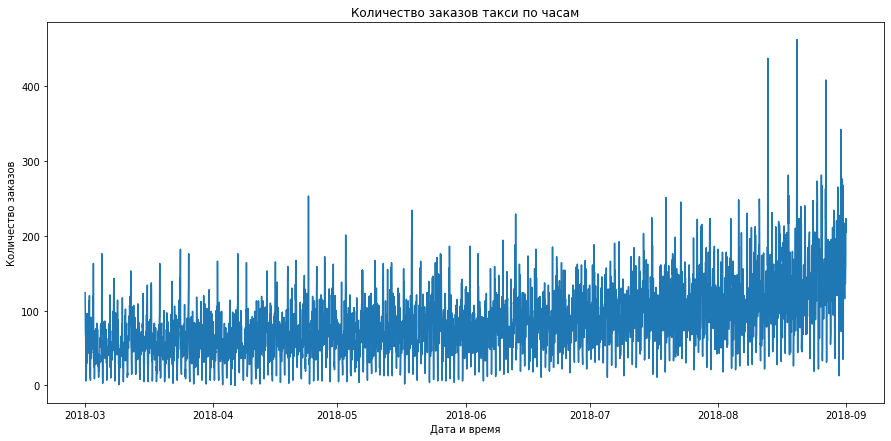

In [7]:
# Построение графика временного ряда
plt.figure(figsize=(15, 7))
plt.plot(taxi_hourly)
plt.title('Количество заказов такси по часам')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов')
plt.show()

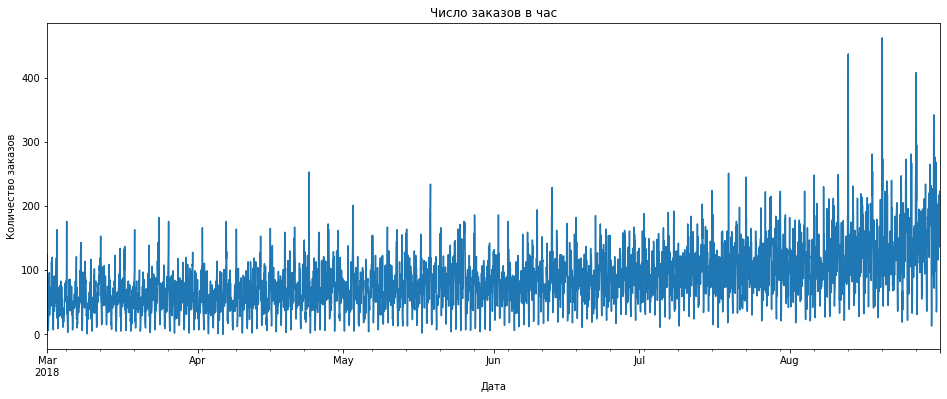

In [8]:
plt.figure(figsize=(16, 6))
taxi_hourly['num_orders'].plot(ax=plt.gca())
plt.title('Число заказов в час')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

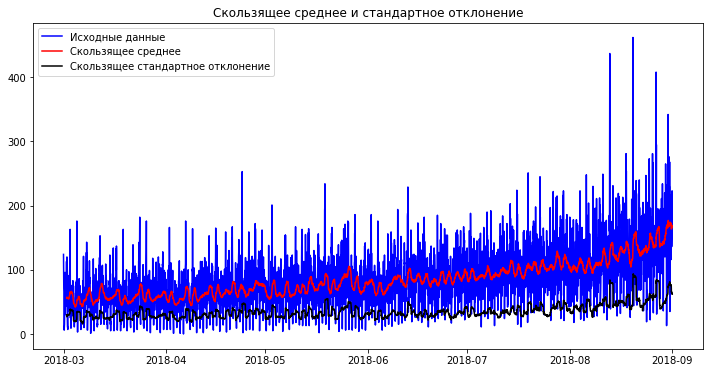

Результаты теста Дики-Фуллера:
Тестовая статистика             -3.068924
p-value                          0.028940
Лаги                            30.000000
Количество наблюдений         4385.000000
Критическое значение (1%)       -3.431842
Критическое значение (5%)       -2.862199
Критическое значение (10%)      -2.567121
dtype: float64


In [9]:
# Проверка временного ряда на стационарность
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Определение статистики и критических значений
    rolmean = timeseries.rolling(window=24).mean()  # скользящее среднее
    rolstd = timeseries.rolling(window=24).std()  # скользящее стандартное отклонение
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Исходные данные')
    plt.plot(rolmean, color='red', label='Скользящее среднее')
    plt.plot(rolstd, color='black', label='Скользящее стандартное отклонение')
    plt.legend(loc='best')
    plt.title('Скользящее среднее и стандартное отклонение')
    plt.show()
    print('Результаты теста Дики-Фуллера:')
    dftest = adfuller(timeseries['num_orders'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Тестовая статистика', 'p-value', 'Лаги', 'Количество наблюдений'])
    for key, value in dftest[4].items():
        dfoutput['Критическое значение (%s)' % key] = value
    print(dfoutput)

# Проверка стационарности временного ряда
test_stationarity(taxi_hourly)

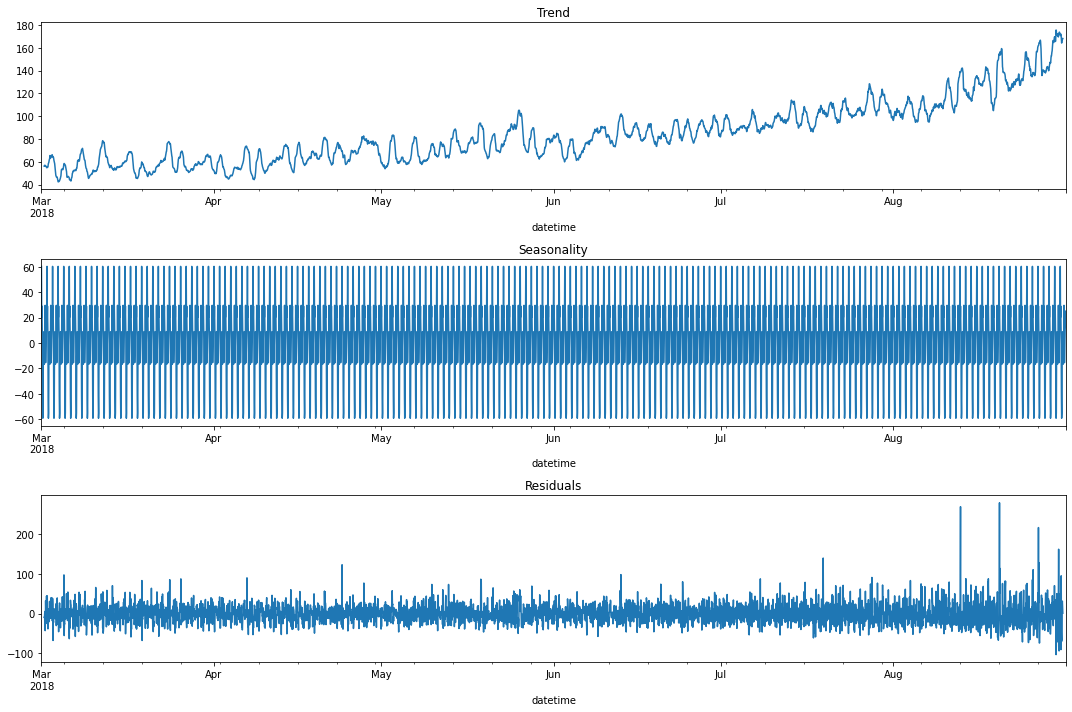

In [10]:
decomposed = seasonal_decompose(taxi_hourly)

plt.figure(figsize=(15, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

<AxesSubplot:xlabel='datetime'>

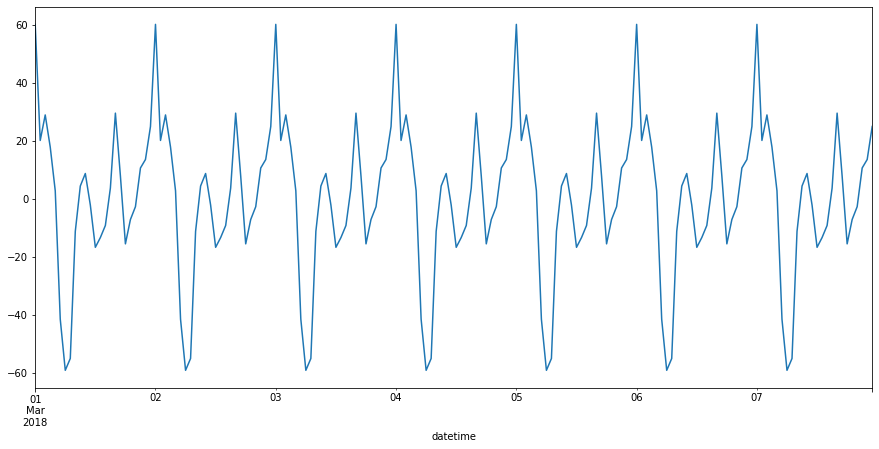

In [11]:
plt.figure(figsize=(15, 7))
decomposed_seasonal = decomposed.seasonal['2018-03-01':'2018-03-07']
decomposed_seasonal.plot()

In [12]:
def make_features(data, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

    for lag in range(1, max_lag+1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(window=rolling_mean_size).mean() 
    data.dropna(inplace=True) 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
У нас данных меньше года, поэтому признак год и месяц создавать не следует

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b>  Готово
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [13]:
make_features(taxi_hourly, 30, 24)

In [14]:
taxi_hourly.head()

,num_orders,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 06:00:00,11,2,4,6,11.0,20.0,64.0,75.0,120.0,90.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,56.208333
2018-03-02 07:00:00,7,2,4,7,11.0,11.0,20.0,64.0,75.0,120.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,56.166667
2018-03-02 08:00:00,46,2,4,8,7.0,11.0,11.0,20.0,64.0,75.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,55.833333
2018-03-02 09:00:00,45,2,4,9,46.0,7.0,11.0,11.0,20.0,64.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,56.333333
2018-03-02 10:00:00,54,2,4,10,45.0,46.0,7.0,11.0,11.0,20.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,55.333333


Вывод:

Для анализа временных рядов были добавлены признаки `day`, `dayofweek`, `hour`, а также созданы `признаки-лаги` и `скользящее среднее` для количества заказов такси

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Декомпозиция сделана верно. Можно еще  визуализировать сезонность на более коротком интервале

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b>  Готово
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Обучение

In [15]:
# Функция расчета rmse
def rmse(actual, pred):
    return mean_squared_error(actual, pred, squared=False)

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [16]:
train, test = train_test_split(taxi_hourly, shuffle=False, test_size=0.1)

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Хорошо, что деление происходит последовательно по времени

In [17]:
target_train = train['num_orders']
features_train = train.drop('num_orders', axis=1)

target_test = test['num_orders']
features_test = test.drop('num_orders', axis=1)

In [18]:
tscv = TimeSeriesSplit(n_splits=5)

In [19]:
%%time

lr = LinearRegression()
cv_lr = cross_val_score(lr, features_train, target_train, cv=tscv, scoring='neg_mean_squared_error')
cv_lr_rmse = np.sqrt(np.abs(cv_lr))
print('Среднее RMSE LinearRegression:', cv_lr_rmse.mean())

Среднее RMSE LinearRegression: 26.959842581357815
CPU times: user 272 ms, sys: 672 ms, total: 943 ms
Wall time: 867 ms


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
При работе с временными рядами не следует использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа нужно передать в параметр cv в метод основанный на кросс-валидации
    
(это касается каждого из экземпляров cross_val_score и/или GridSearchCV)
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b>  Готово
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [20]:
%%time

# Создаем объект модели RandomForestRegressor
rf = RandomForestRegressor(random_state=STATE)

# Определяем диапазоны гиперпараметров для перебора
param_rf  = {
    'n_estimators': range(10, 100, 5),
    'max_depth': range(1, 10, 2),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Создаем объект RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rf,
    cv=tscv,
    n_iter=10,
    scoring=rmse_scorer,
    n_jobs=-1,
    random_state=STATE
)

# Обучаем модель на данных
rf_search.fit(features_train, target_train)

# Выводим наилучшие гиперпараметры
print(rf_search.best_params_)

# Выводим результаты перекрестной проверки
print('RMSE RandomForestRegressor:', -rf_search.best_score_)

{'n_estimators': 35, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 9}
RMSE RandomForestRegressor: 25.59530680488413
CPU times: user 30.2 s, sys: 140 ms, total: 30.3 s
Wall time: 30.4 s


In [21]:
%%time

param_cat = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'depth': range(2, 10, 2),
    'iterations': range(100, 500, 50)
}

cat = CatBoostRegressor(random_state=STATE)

cat_result = cat.randomized_search(param_cat,
                                   features_train,
                                   target_train,
                                   partition_random_seed=STATE,
                                   plot=True,
                                   cv=tscv,
                                   n_iter=50)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 76.0612859	test: 111.5266427	best: 111.5266427 (0)	total: 48.3ms	remaining: 4.79s
1:	learn: 72.9867013	test: 108.0779218	best: 108.0779218 (1)	total: 50ms	remaining: 2.45s
2:	learn: 70.0212917	test: 104.8523503	best: 104.8523503 (2)	total: 51.6ms	remaining: 1.67s
3:	learn: 67.2590486	test: 101.6021739	best: 101.6021739 (3)	total: 52.9ms	remaining: 1.27s
4:	learn: 64.5325492	test: 98.3565948	best: 98.3565948 (4)	total: 54.3ms	remaining: 1.03s
5:	learn: 61.9409073	test: 95.2175749	best: 95.2175749 (5)	total: 55.7ms	remaining: 872ms
6:	learn: 59.4834910	test: 92.2476289	best: 92.2476289 (6)	total: 57ms	remaining: 757ms
7:	learn: 57.1959127	test: 89.7464661	best: 89.7464661 (7)	total: 58.3ms	remaining: 670ms
8:	learn: 55.0699990	test: 87.1276393	best: 87.1276393 (8)	total: 59.7ms	remaining: 604ms
9:	learn: 53.0040712	test: 84.5767326	best: 84.5767326 (9)	total: 61ms	remaining: 549ms
10:	learn: 51.0677264	test: 82.0836467	best: 82.0836467 (10)	total: 62.5ms	remaining: 506ms
11:	le

In [22]:
print('Best RMSE', cat_result['cv_results']['test-RMSE-mean'][-1])
display(cat_result['params'])

Best RMSE 27.693824682749618


{'depth': 6, 'iterations': 250, 'learning_rate': 0.5}

In [23]:
best_rf = rf_search.best_estimator_
models = {'Linear Regression': lr,
          'Random Forest': best_rf,
          'CatBoost': cat}

results_df = pd.DataFrame(columns=['Модель', 'RMSE на тренировочной выборке'])

for name, model in models.items():
    print('#' * 50)
    print(f'Training {name} model...')
    model.fit(features_train, target_train)
    
    predicted_train = model.predict(features_train)
    
    rmse_train = mean_squared_error(target_train, predicted_train, squared=False)
    
    print(f'Training {name} finished!')
    print('#' * 50)
    new_results_df = pd.DataFrame({
        'Модель': [name],
        'RMSE на тренировочной выборке': [rmse_train],
    })
    results_df = results_df.append(new_results_df, ignore_index=True)

##################################################
Training Linear Regression model...
Training Linear Regression finished!
##################################################
##################################################
Training Random Forest model...
Training Random Forest finished!
##################################################
##################################################
Training CatBoost model...
0:	learn: 30.9263712	total: 9.26ms	remaining: 2.31s
1:	learn: 27.1871943	total: 16.7ms	remaining: 2.07s
2:	learn: 25.7530834	total: 23.9ms	remaining: 1.97s
3:	learn: 24.5745393	total: 31.3ms	remaining: 1.92s
4:	learn: 23.9226724	total: 38.2ms	remaining: 1.87s
5:	learn: 23.5349811	total: 44.9ms	remaining: 1.82s
6:	learn: 23.4251174	total: 52.4ms	remaining: 1.82s
7:	learn: 23.0241429	total: 60.7ms	remaining: 1.84s
8:	learn: 22.6557286	total: 68.2ms	remaining: 1.82s
9:	learn: 22.4236600	total: 75.4ms	remaining: 1.81s
10:	learn: 22.2997508	total: 82.7ms	remaining: 1.8s
11:	lear

In [24]:
results_df['RMSE на кросс-валидации'] = [cv_lr_rmse.mean(), -rf_search.best_score_, cat_result['cv_results']['test-RMSE-mean'][-1]]

In [25]:
results_df

,Модель,RMSE на тренировочной выборке,RMSE на кросс-валидации
0,Linear Regression,25.558585,26.959843
1,Random Forest,16.297426,25.595307
2,CatBoost,5.239580,27.693825


Вывод:

По результатам обучения 3 моделей - Linear Regression, Random Forest и CatBoost - на тренировочной выборке и кросс-валидации получены значения RMSE. Наименьшее значение RMSE на кросс-валидации получено для модели Random Forest `25.6`, что говорит о ее лучшей точности прогнозирования по сравнению с двумя другими моделями.

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Молодец, что пробуешь разные модели в этом шаге)
</div>

## Тестирование

In [26]:
print('#' * 50)
print('Training Random Forest model...')
    
predicted_test = best_rf.predict(features_test)

rmse_test = mean_squared_error(target_test, predicted_test, squared=False)
    
print('Training Random Forest finished!')
print('#' * 50)

results_df.loc[results_df['Модель'] == 'Random Forest', 'RMSE на тестовой выборке'] = rmse_test

##################################################
Training Random Forest model...
Training Random Forest finished!
##################################################


In [27]:
results_df

,Модель,RMSE на тренировочной выборке,RMSE на кросс-валидации,RMSE на тестовой выборке
0,Linear Regression,25.558585,26.959843,NaN
1,Random Forest,16.297426,25.595307,45.973667
2,CatBoost,5.239580,27.693825,NaN


Text(0, 0.5, 'Число заказов')

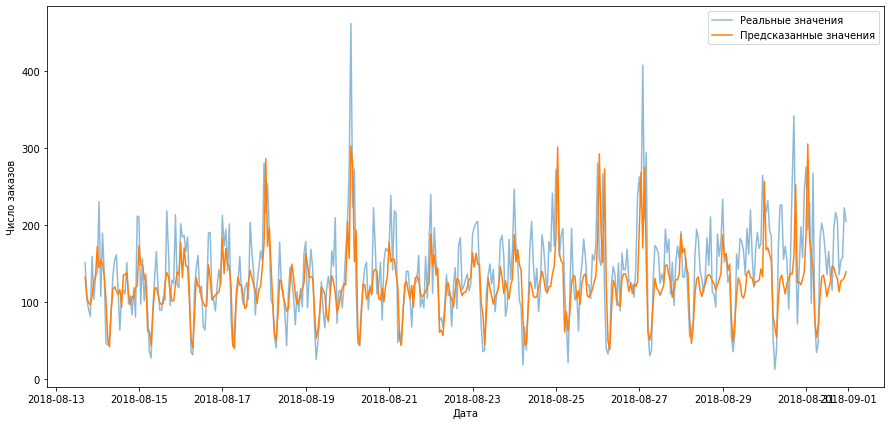

In [30]:
plt.figure(figsize=(15, 7))
plt.plot(target_test.index, target_test.values, label='Реальные значения', alpha=0.5)
plt.plot(target_test.index, predicted_test, label='Предсказанные значения')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Число заказов')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    
В конце проекта желательно визуализировать результаты, показать предсказанные значения лучшей модели и реальные тестовые
        


<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b>  Готово
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Вывод:

В данном проекте была поставлена задача предсказания количества заказов такси в определенный час на основе предыдущих значений.

В рамках проекта были выполнены следующие шаги:

* Загрузка данных и преобразование индекса.
* Создание новых признаков и ресемплирование данных.
* Обучение трех моделей: Linear Regression, Random Forest и CatBoost. 
* Выбор лучшей модели на основе значений метрики RMSE на кросс-валидации и тестовой выборке.

Из результатов работы видно, что наилучший результат показала модель Random Forest, которая имеет RMSE на тестовой выборке равный 45.97. Она позволяет предсказать количество заказов такси с точностью, достаточной для решения бизнес-задачи.

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с этим проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована кросс-валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера 2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально. Принимаю работу)
    
Если хочешь лучше разобраться в теме, то могу посоветовать тебе: 
    
Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k    
    
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A
    
Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing
    
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg
https://facebook.github.io/prophet/
    
https://facebook.github.io/prophet/docs/quick_start.html#python-api
    
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb  
    
    
    
В этом проекте были отработаны все моменты. 
    
Успехов тебе в следующем спринте!
    
Рад был помочь тебе)
    
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48